# Churn Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## EDA

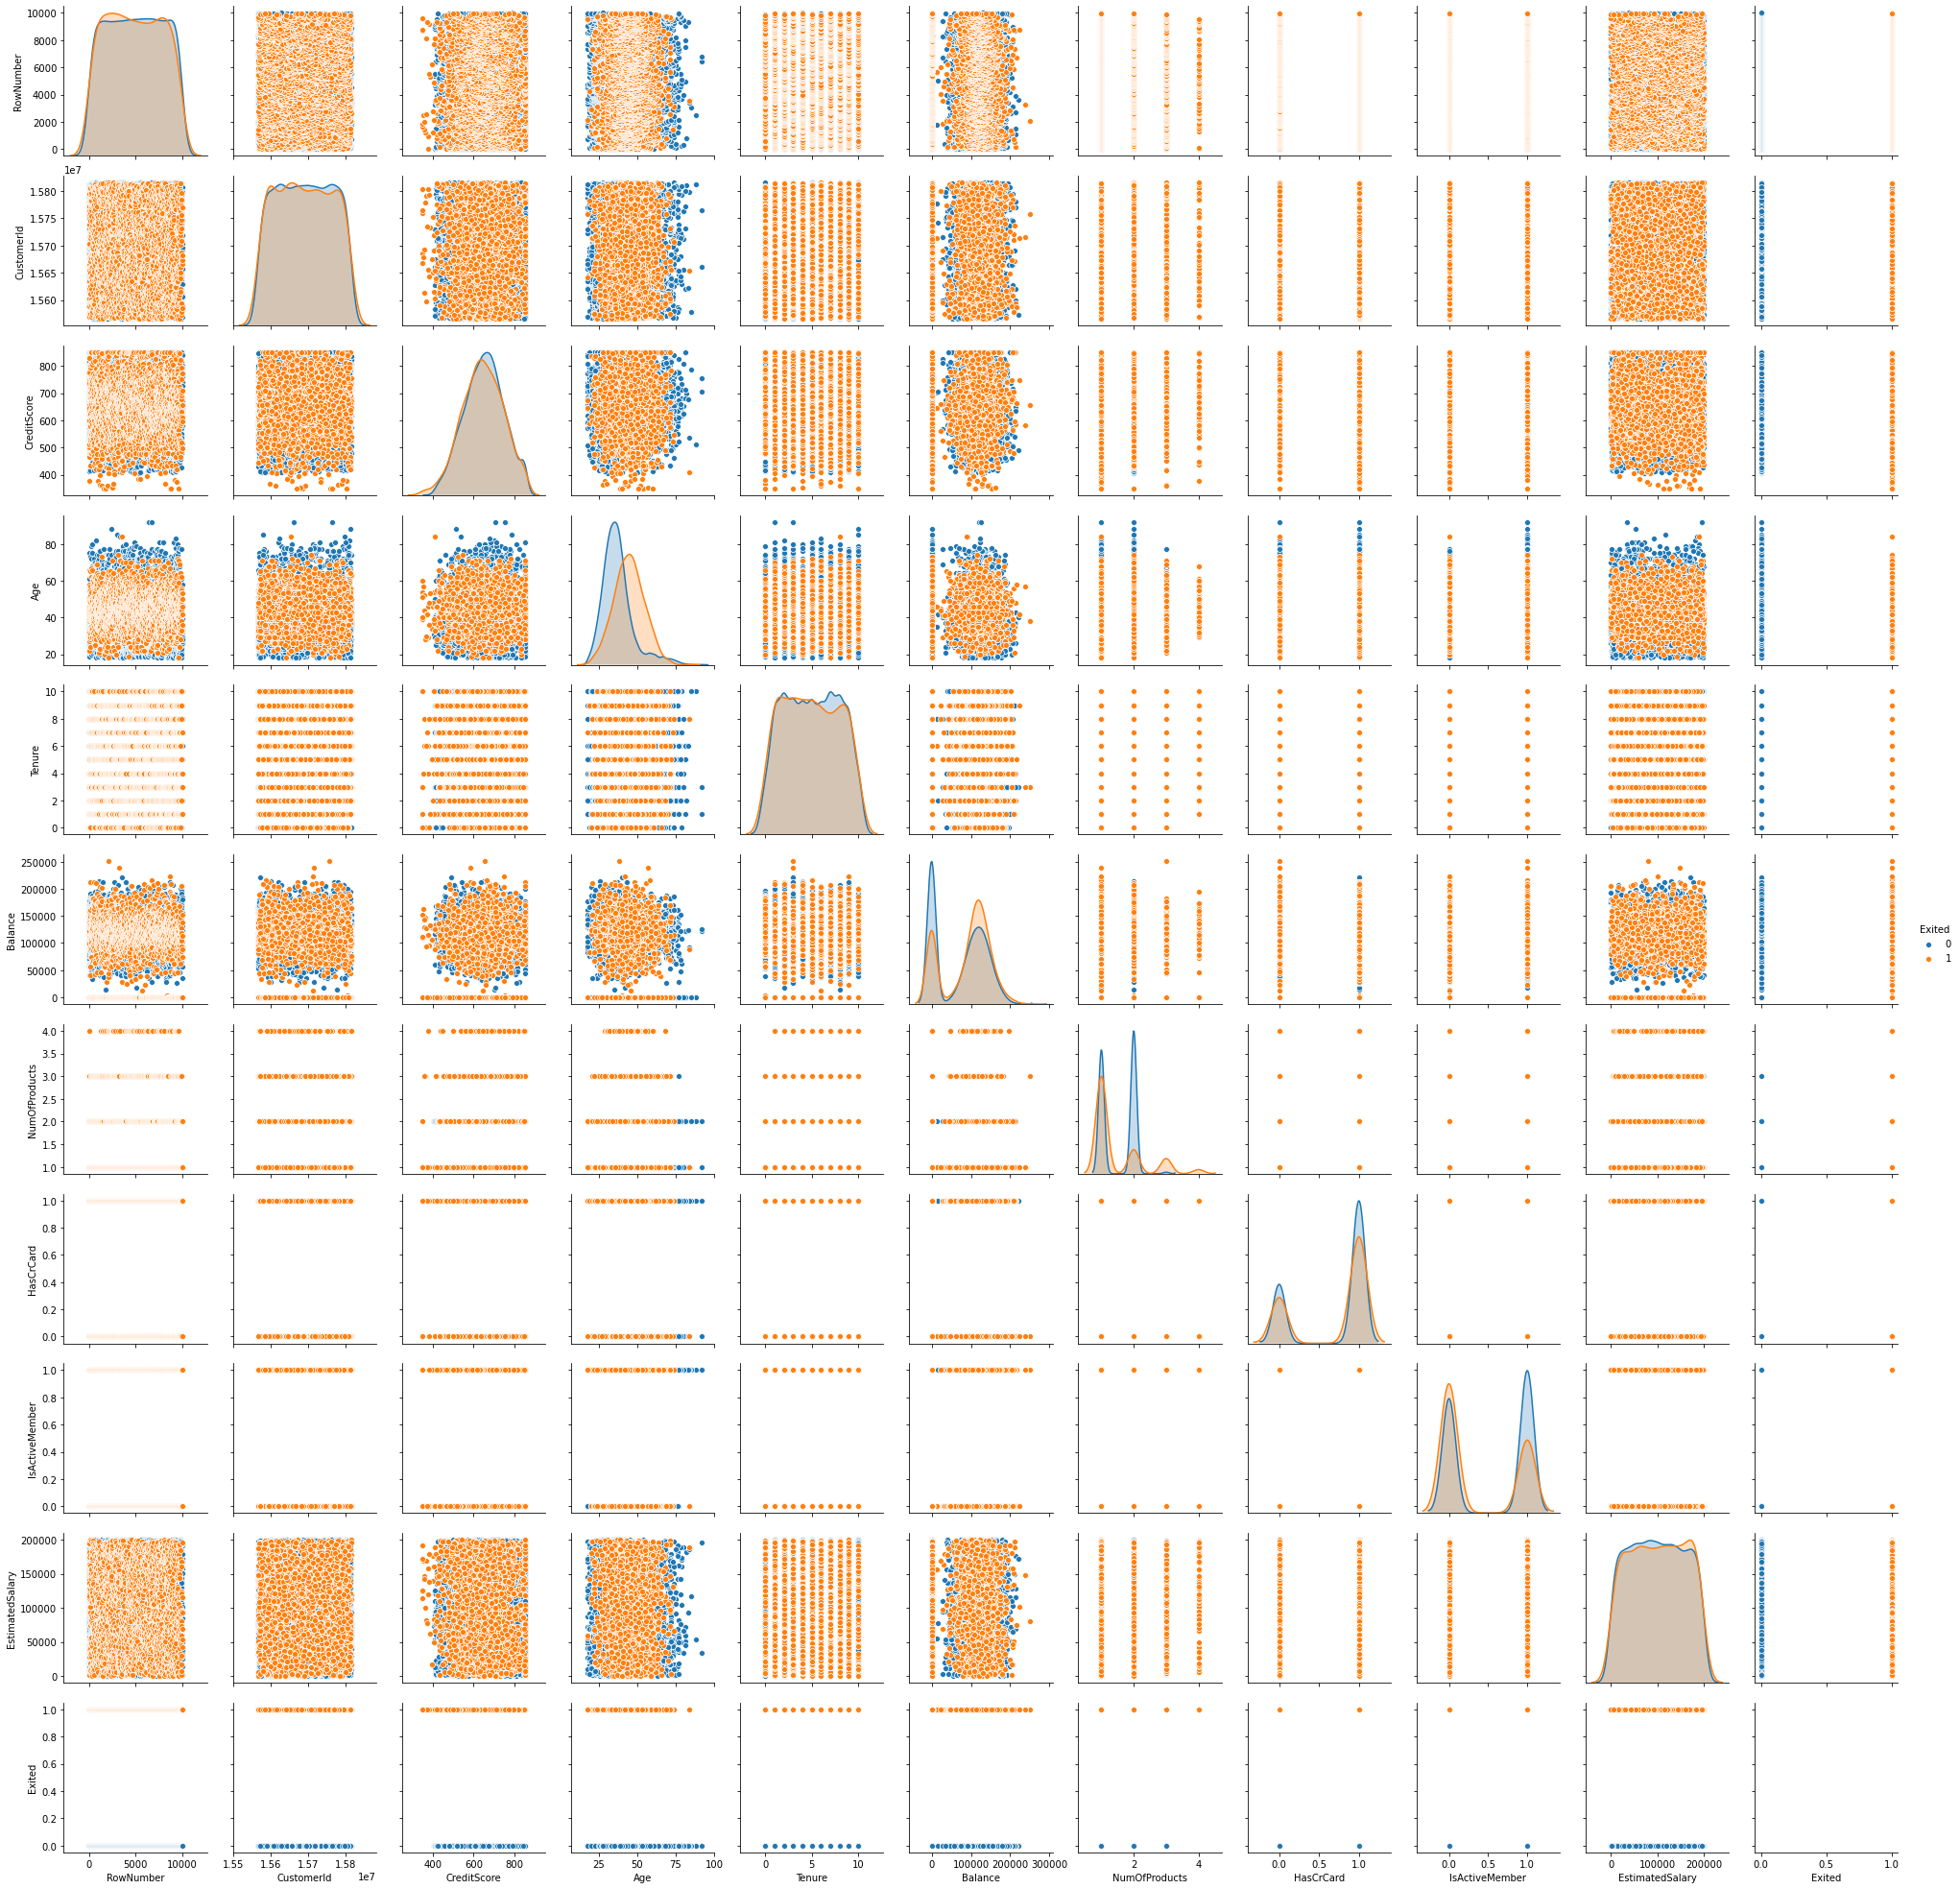

In [5]:
sns.pairplot(data=data,hue='Exited')

## Data Preprocessing

In [4]:
data = pd.get_dummies(data,columns=['Geography','Gender'])
data.drop(['Geography_France','Gender_Female'],axis=1,inplace=True)

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')

In [6]:
X = data[['CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male']]
y = data['Exited']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Tensorflow and Keras

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [66]:
# Dropout Regularization to overcome overfitting
model = Sequential()
model.add(Dense(6,activation='relu'))
model.add(Dropout(p=0.1))
model.add(Dense(6,activation='relu'))
model.add(Dropout(p=0.1))
model.add(Dense(1,activation='sigmoid'))

In [68]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
model.fit(X_train,y_train.values,epochs=20,batch_size=10)

Epoch 1/20
8000/8000 [==============================] - 1s 110us/step - loss: 0.5614 - accuracy: 0.7406
Epoch 2/20
8000/8000 [==============================] - 1s 93us/step - loss: 0.4741 - accuracy: 0.7941
Epoch 3/20
8000/8000 [==============================] - 1s 94us/step - loss: 0.4580 - accuracy: 0.7986
Epoch 4/20
8000/8000 [==============================] - 1s 95us/step - loss: 0.4496 - accuracy: 0.8024
Epoch 5/20
8000/8000 [==============================] - 1s 105us/step - loss: 0.4489 - accuracy: 0.8029
Epoch 6/20
8000/8000 [==============================] - 1s 101us/step - loss: 0.4450 - accuracy: 0.8036
Epoch 7/20
8000/8000 [==============================] - 1s 99us/step - loss: 0.4399 - accuracy: 0.8067
Epoch 8/20
8000/8000 [==============================] - 1s 100us/step - loss: 0.4385 - accuracy: 0.8071
Epoch 9/20
8000/8000 [==============================] - 1s 99us/step - loss: 0.4346 - accuracy: 0.8081
Epoch 10/20
8000/8000 [==============================] - 1s 106us/ste

## Model Evaluation

In [70]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print("Test Loss:",test_loss,"\nTest Accuracy:",test_acc)

2000/2000 [==============================] - 0s 27us/step
Test Loss: 0.34400525569915774 
Test Accuracy: 0.8650000095367432


In [28]:
predictions = model.predict(X_test)

In [29]:
predictions = (predictions>0.5)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
print(confusion_matrix(y_test,predictions))

[[1567   55]
 [ 200  178]]


## Predicting Single Data

In [33]:
dict = {'CreditScore':600, 'Age':40, 'Tenure':3,
       'Balance':60000, 'NumOfProducts':2, 'HasCrCard':1, 'IsActiveMember':1,
       'EstimatedSalary':50000, 'Geography_Germany':0, 'Geography_Spain':0,
       'Gender_Male':1}
test_data = pd.DataFrame([dict])

In [35]:
test_data = scaler.transform(test_data)

In [46]:
pred = model.predict(test_data)

In [47]:
pred = (pred>0.5)
pred[0][0]

False

## K-Fold Cross Validation

In [10]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [63]:
def build_model():
    model = Sequential()
    model.add(Dense(6,activation='relu'))
    model.add(Dropout(p=0.1))
    model.add(Dense(6,activation='relu'))
    model.add(Dropout(p=0.1))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [71]:
model = KerasClassifier(build_fn=build_model,epochs=20,batch_size=10)

In [72]:
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=10,n_jobs=-1,verbose=2)

In [73]:
accuracies

array([0.86124998, 0.84750003, 0.83749998, 0.83249998, 0.83249998,
       0.82249999, 0.85374999, 0.84875   , 0.82749999, 0.84875   ])

In [74]:
mean_acc = accuracies.mean()
acc_variance = accuracies.std()

In [75]:
print("Mean:",mean_acc)
print("\nVariance:",acc_variance)

Mean: 0.8412499904632569

Variance: 0.011898007716378669


## Performance Tuning

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
def build_model(optimizer,nb_neurons):
    model = Sequential()
    model.add(Dense(nb_neurons,activation='relu'))
    model.add(Dense(nb_neurons,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [13]:
model = KerasClassifier(build_fn=build_model)

In [14]:
parameters = {
    'batch_size':[10,20,30,40],
    'epochs':[20,30,40,50],
    'optimizer':['adam','rmsprop'],
    'nb_neurons':[6,10,15,20]
}

In [15]:
grid_search = GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1,verbose=5)

In [16]:
grid_search = grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 51.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 71.2min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 83.2min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 97.6min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed: 106.3min finished


Epoch 1/20
8000/8000 [==============================] - 1s 92us/step - loss: 0.4753 - accuracy: 0.7879
Epoch 2/20
8000/8000 [==============================] - 1s 79us/step - loss: 0.4182 - accuracy: 0.8184
Epoch 3/20
8000/8000 [==============================] - 1s 79us/step - loss: 0.4039 - accuracy: 0.8288
Epoch 4/20
8000/8000 [==============================] - 1s 80us/step - loss: 0.3812 - accuracy: 0.8428
Epoch 5/20
8000/8000 [==============================] - 1s 81us/step - loss: 0.3616 - accuracy: 0.8530
Epoch 6/20
8000/8000 [==============================] - 1s 81us/step - loss: 0.3513 - accuracy: 0.8564
Epoch 7/20
8000/8000 [==============================] - 1s 90us/step - loss: 0.3477 - accuracy: 0.8595
Epoch 8/20
8000/8000 [==============================] - 1s 81us/step - loss: 0.3442 - accuracy: 0.8575
Epoch 9/20
8000/8000 [==============================] - 1s 78us/step - loss: 0.3433 - accuracy: 0.8585
Epoch 10/20
8000/8000 [==============================] - 1s 76us/step - l

In [17]:
best_params = grid_search.best_params_
best_acc = grid_search.best_score_

In [18]:
print("Best Parameter:",best_params)
print("Best Score:",best_acc)

Best Parameter: {'batch_size': 10, 'epochs': 20, 'nb_neurons': 15, 'optimizer': 'rmsprop'}
Best Score: 0.859
